## TASK1

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as pt

In [2]:
df = pd.read_csv("data/winequality/winequality-red.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['classified']=[1 if x>=6 else 0 for x in df["quality"] ]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,classified
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


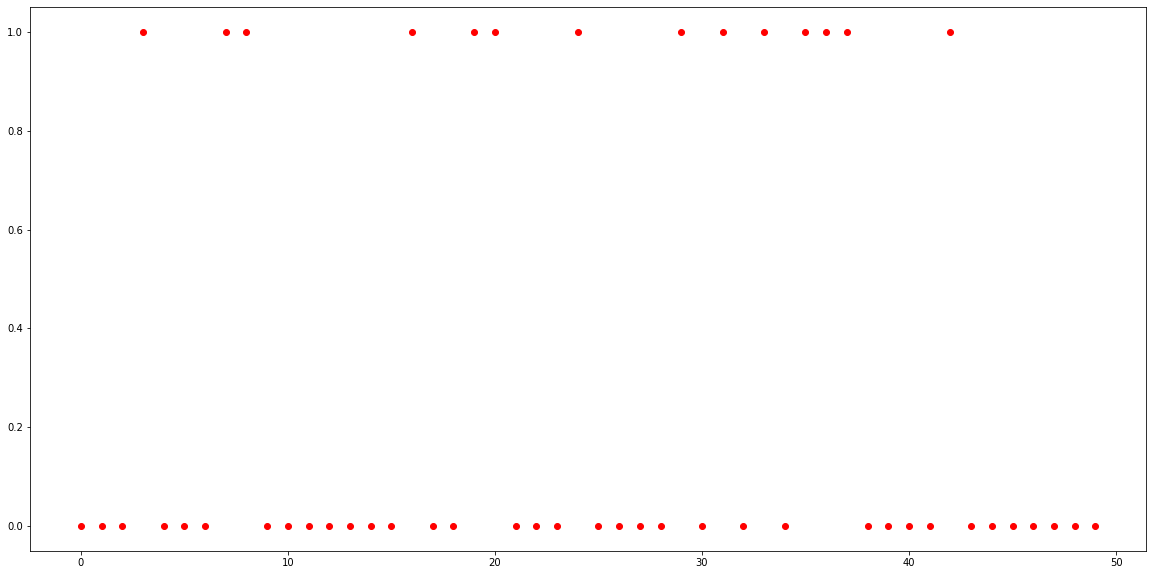

In [4]:
pt.figure(figsize=(20,10))
pt.plot(df['classified'][:50], 'ro')
# pt.scatter(df['chlorides'][:20], df['classified'][:20])

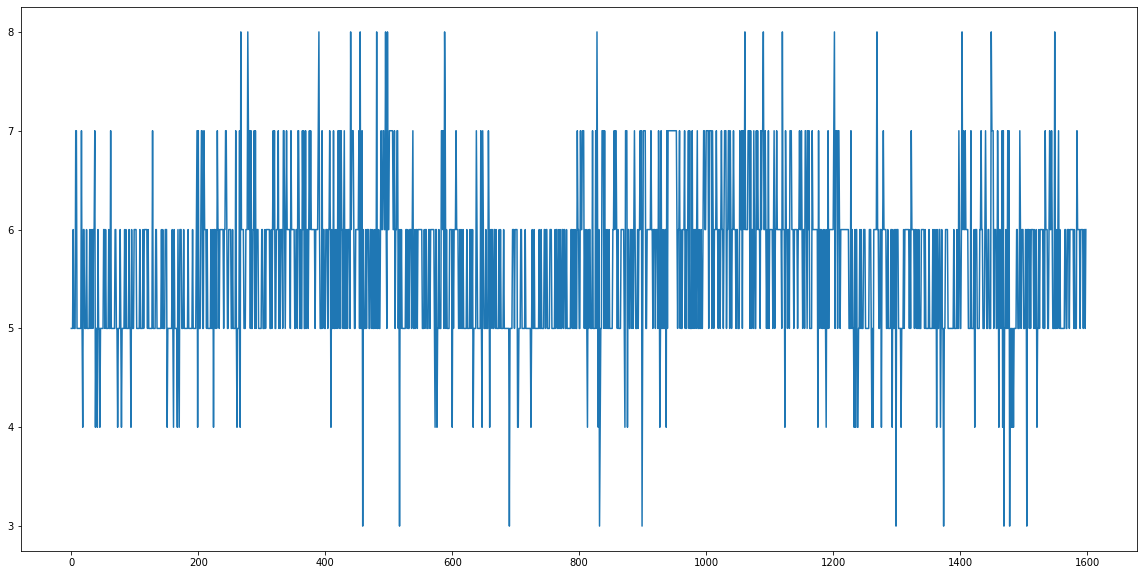

In [5]:
pt.figure(figsize=(20,10))
pt.plot(df['quality'])
pt.show()

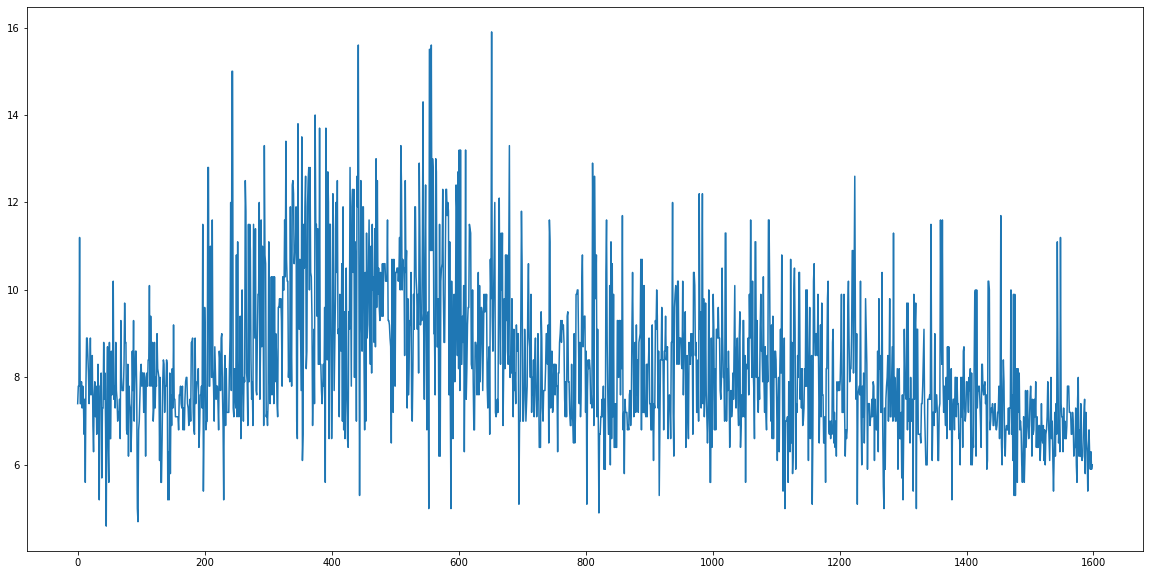

In [6]:
pt.figure(figsize=(20,10))
pt.plot(df['fixed acidity'])
pt.show()

## TASK 2

#### Logistic Regression

In [7]:
#wk+1 =	wk +	αk	∑i=1:n xi	(yi – σ(wkTxi))
from sklearn.model_selection import train_test_split

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'classified'],
      dtype='object')

In [275]:
X_train, X_test, y_train, y_test= train_test_split(df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']], df.classified, train_size=0.9)
print("done")

done


In [9]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1535,7.0,0.550,0.13,2.20,0.075,15.0,35.0,0.99590,3.36,0.59,9.7
1408,8.1,0.290,0.36,2.20,0.048,35.0,53.0,0.99500,3.27,1.01,12.4
613,8.2,0.390,0.38,1.50,0.058,10.0,29.0,0.99620,3.26,0.74,9.8
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7
1522,6.1,0.320,0.25,2.30,0.071,23.0,58.0,0.99633,3.42,0.97,10.6
...,...,...,...,...,...,...,...,...,...,...,...
439,7.0,0.620,0.18,1.50,0.062,7.0,50.0,0.99510,3.08,0.60,9.3
801,8.6,0.550,0.09,3.30,0.068,8.0,17.0,0.99735,3.23,0.44,10.0
1546,7.0,0.570,0.02,2.00,0.072,17.0,26.0,0.99575,3.36,0.61,10.2
1524,6.0,0.420,0.19,2.00,0.075,22.0,47.0,0.99522,3.39,0.78,10.0


In [10]:
y_test

1535    1
1408    1
613     0
690     0
1522    0
       ..
439     0
801     0
1546    0
1524    1
821     1
Name: classified, Length: 160, dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model=LogisticRegression()
model.fit(X_train, y_train)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

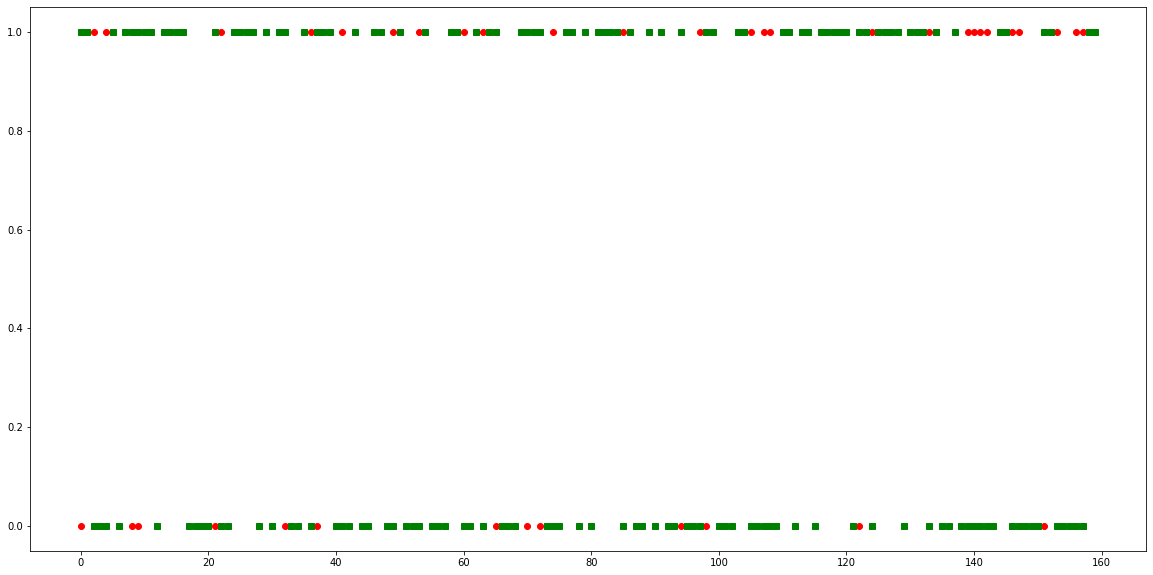

In [13]:
y_predicted = model.predict(X_test)
pt.figure(figsize=(20,10))
pt.plot(range(160), y_predicted, 'ro', range(160), y_test, 'gs')
pt.show()

In [14]:
model.score(X_test, y_test)

0.75625

#### Linear Discriminant Analysis

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

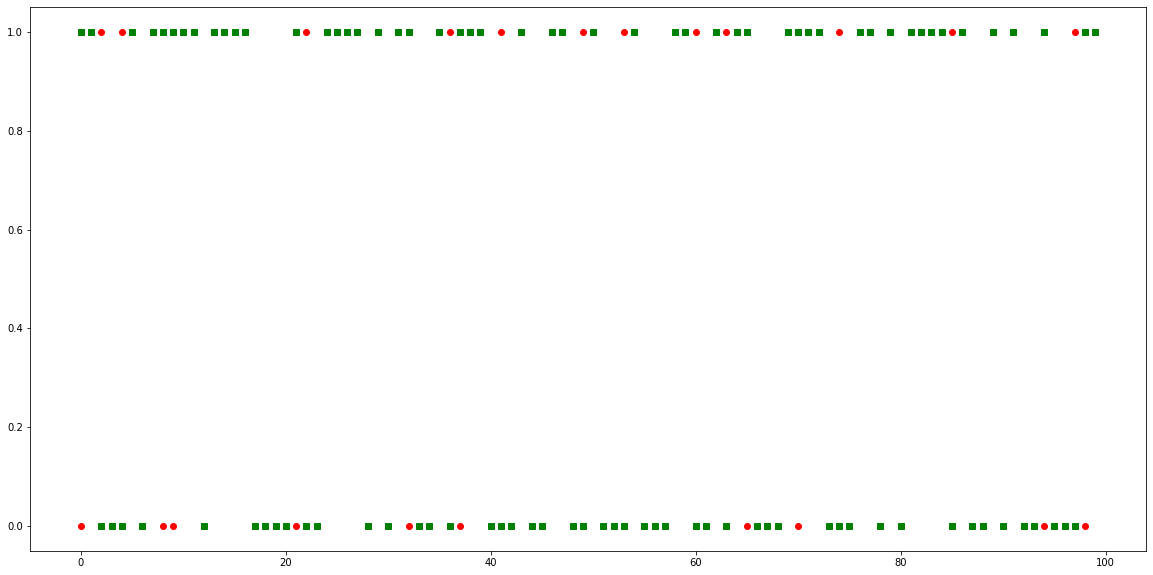

In [17]:
y_predicted = clf.predict(X_test)
pt.figure(figsize=(20,10))
pt.plot(range(100), y_predicted[:100], 'ro', range(100), y_test[:100], 'gs')
pt.show()

In [18]:
clf.score(X_test,y_test)

0.76875

In [19]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y = df['classified']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: classified, dtype: int64

In [250]:
class LogisticRegression:
    learning_rate = 0.01
    initial_params = np.array([0]*11)
    X_train= []
    y_train = []
    model_params = []
    
    def _stable_sigmoid(self, x):
        "Numerically stable sigmoid function."
        if x >= 0:
            z = np.exp(-x)
            sig = 1 / (1 + z)
        else:
            # if x is less than zero then z will be small, denom can't be
            # zero because it's 1+z.
            z = np.exp(x)
            sig = z / (1 + z)
        
        return sig
    
    def _sigmoid(self, x):
        exponential_factor = np.exp(-x)
        sigmoid_result = 1.0 / (1.0 + exponential_factor)
        return sigmoid_result

    def fit(self, learning_rate, max_iterations, X_train, y_train):
        self.learning_rate = learning_rate
        ##TODO: find out if this should be a plus 1, cause of the bias
#         self.initial_params = np.array([np.random.normal(size=len(X_train[0]))])
        
        # setting this to 0 for testing purposes
        self.initial_params = np.array([0]*len(X_train[0]))
        self.X_train = X_train
        self.y_train = y_train
        
        curr_iteration = 0
        current_params = self.initial_params
        
        ## there should be another check that stops that iterations as well, we can by pass the local minima
        while (curr_iteration < max_iterations ):
            ## assuming that the learning_rate is fixed, just get it from the global data
            next_params = self._get_next_params(current_params, self.learning_rate)
            print("difference", abs(current_params- next_params))
            curr_iteration+=1
            current_params = next_params
            print("iteration at", curr_iteration, "params:", next_params)
        
        self.model_params = next_params
        print("Model Trained with params", self.model_params)
            
    #implement the right hand side of the equation
    def _get_next_params(self, current_params, learning_rate):
        decrement = learning_rate*self._calculate_sum_factor(current_params)
#         print("decrement ", decrement)
        return current_params + decrement

    def _calculate_sum_factor(self, current_params):
        ## this should be a 1 x m where m is the number of features
        print(type(X_train))
        total = np.array([0]*len(self.X_train[0]))
        for row in range(len(self.X_train)):
            product_for_sum = self._get_internal_product(row, current_params)
            total = total + product_for_sum
#             print("product for sum", product_for_sum, "total", total)

        return total
    
    def _get_internal_product(self, row, current_params):
        ## this should be a 1xm
        classification_difference = self._get_difference(row, current_params)
#         print("classification difference", classification_difference)
        return self.X_train[row] * classification_difference

    def _get_difference(self, row, current_params):
        sigmoid_product = np.dot(current_params.T, self.X_train[row])
#         print("sigmoid_product", sigmoid_product, "current_params", current_params, "row", self.X_train[row])
        sigmoid_result = self._stable_sigmoid(sigmoid_product)
#         print("sigmoid_result", sigmoid_result, "expected value", self.y_train[row])
#         print("sigmoidProduct", sigmoid_product, "sigmoid_result", sigmoid_result)
        #this should be mxm
        return self.y_train[row] - sigmoid_result
    
    def predict(self, X_test):
        #returns an array of y_test
        y_test= np.array([0.0]*len(X_test))
        
        for row in range(len(X_test)):
            sigmoid_product = np.dot(self.model_params.T, X_test[row])
            sigmoid_result = self._stable_sigmoid(sigmoid_product)
            y_test[row] = 1 if sigmoid_result >= 0.50000 else 0
            print("sigmoidProduct", sigmoid_product, "sigmoid_result", sigmoid_result, "ytest", y_test[row])
        
        return y_test


In [251]:
model = LogisticRegression()

In [252]:
def _sigmoid(x):
    exponential_factor = np.exp(-x)
    return 1//(1 + exponential_factor)

In [253]:
def fit(X_train, y_train, alpha, params):
    sig_res = _sigmoid(params.T.dot(X_train))

In [276]:
np_xtrain = np.array(X_train)
np_ytrain = np.array(y_train)
# [np.array(row) for row in X_train[2]]
np_ytrain.shape
np_params = np_xtrain[0]
np_xtrain[0].T

array([12.4   ,  0.35  ,  0.49  ,  2.6   ,  0.079 , 27.    , 69.    ,
        0.9994,  3.12  ,  0.75  , 10.4   ])

In [277]:
_sigmoid(-17979.636591124254)

/Users/faizank/Documents/courses/comp551/mini_project1/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.0

In [278]:
model.fit(0.000001, 100, np_xtrain, np_ytrain)

<class 'pandas.core.frame.DataFrame'>
difference [6.0400000e-04 1.0277500e-05 3.5985000e-05 1.3247500e-04 1.4480000e-06
 3.9775000e-04 2.9805000e-03 5.8087995e-05 1.9310500e-04 6.5230000e-05
 9.3895000e-04]
iteration at 1 params: [ 6.0400000e-04 -1.0277500e-05  3.5985000e-05  1.3247500e-04
  1.4480000e-06  3.9775000e-04 -2.9805000e-03  5.8087995e-05
  1.9310500e-04  6.5230000e-05  9.3895000e-04]
<class 'pandas.core.frame.DataFrame'>
difference [9.43301236e-04 1.22400650e-05 4.74259908e-05 2.47950553e-04
 5.13875689e-06 1.29145521e-03 6.45735624e-05 9.95834363e-05
 3.30658700e-04 9.26718157e-05 1.36570620e-03]
iteration at 2 params: [ 1.54730124e-03  1.96256499e-06  8.34109908e-05  3.80425553e-04
  6.58675689e-06  1.68920521e-03 -2.91592644e-03  1.57671431e-04
  5.23763700e-04  1.57901816e-04  2.30465620e-03]
<class 'pandas.core.frame.DataFrame'>
difference [8.01694669e-04 3.31028336e-06 4.27725558e-05 2.02885960e-04
 3.65940394e-06 9.65370733e-04 8.47870300e-04 8.26018901e-05
 2.742509

difference [4.21028255e-04 1.66299268e-05 3.10755174e-05 1.06487719e-04
 2.28083346e-07 5.00640784e-04 3.39012452e-04 3.98478870e-05
 1.31412094e-04 5.26729845e-05 7.10782407e-04]
iteration at 24 params: [ 1.47652379e-02 -1.54085750e-04  8.89760532e-04  3.74594050e-03
  4.75600711e-05  1.77551931e-02 -1.34094474e-02  1.48046437e-03
  4.90426966e-03  1.61601742e-03  2.29013065e-02]
<class 'pandas.core.frame.DataFrame'>
difference [4.07840281e-04 1.73280241e-05 3.06630747e-05 1.03063354e-04
 1.08770911e-07 4.84380034e-04 3.29483099e-04 3.83613960e-05
 1.26452193e-04 5.16766445e-05 6.94234273e-04]
iteration at 25 params: [ 1.51730782e-02 -1.71413774e-04  9.20423607e-04  3.84900386e-03
  4.76688420e-05  1.82395731e-02 -1.37389305e-02  1.51882577e-03
  5.03072186e-03  1.66769406e-03  2.35955408e-02]
<class 'pandas.core.frame.DataFrame'>
difference [3.95062241e-04 1.80043131e-05 3.02631838e-05 9.97452955e-05
 6.77598889e-09 4.68697059e-04 3.20250666e-04 3.69212125e-05
 1.21647019e-04 5.07114

difference [1.92780149e-04 2.87114662e-05 2.39004836e-05 4.72788806e-05
 1.82936088e-06 2.31532555e-04 1.74666307e-04 1.41240912e-05
 4.56070544e-05 3.54420832e-05 4.24068189e-04]
iteration at 48 params: [ 2.16944151e-02 -7.21251037e-04  1.53589674e-03  5.47748017e-03
  2.43806646e-05  2.59709552e-02 -1.92556012e-02  2.07895118e-03
  6.86437021e-03  2.64041110e-03  3.59728539e-02]
<class 'pandas.core.frame.DataFrame'>
difference [1.86296854e-04 2.90553076e-05 2.36956530e-05 4.56017287e-05
 1.88760562e-06 2.24343473e-04 1.70037750e-04 1.33928876e-05
 4.31685338e-05 3.49526603e-05 4.15906852e-04]
iteration at 49 params: [ 2.18807120e-02 -7.50306345e-04  1.55959240e-03  5.52308190e-03
  2.24930589e-05  2.61952986e-02 -1.94256389e-02  2.09234407e-03
  6.90753875e-03  2.67536377e-03  3.63887608e-02]
<class 'pandas.core.frame.DataFrame'>
difference [1.79990988e-04 2.93898317e-05 2.34963820e-05 4.39709103e-05
 1.94424897e-06 2.17381144e-04 1.65539708e-04 1.26816053e-05
 4.07964450e-05 3.44765

difference [7.32807592e-05 3.50740573e-05 2.01188177e-05 1.64591117e-05
 2.90217230e-06 1.04907729e-04 9.02465592e-05 6.19297378e-07
 5.62211196e-07 2.64080406e-05 2.73168139e-04]
iteration at 73 params: [ 2.47963883e-02 -1.53035002e-03  2.07907874e-03  6.21602965e-03
 -3.67744013e-05  2.99114365e-02 -2.24043589e-02  2.23810803e-03
  7.35769750e-03  3.39669714e-03  4.44082942e-02]
<class 'pandas.core.frame.DataFrame'>
difference [6.99394999e-05 3.52531830e-05 2.00129703e-05 1.56010704e-05
 2.93217033e-06 1.01584915e-04 8.79244601e-05 2.40223247e-07
 7.02737954e-07 2.61546770e-05 2.68925117e-04]
iteration at 74 params: [ 2.48663278e-02 -1.56560320e-03  2.09909171e-03  6.23163072e-03
 -3.97065716e-05  3.00130214e-02 -2.24922834e-02  2.23834825e-03
  7.35699476e-03  3.42285182e-03  4.46772194e-02]
<class 'pandas.core.frame.DataFrame'>
difference [6.66820767e-05 3.54279203e-05 1.99097808e-05 1.47648172e-05
 2.96141798e-06 9.83600341e-05 8.56635247e-05 1.29477114e-07
 1.93646903e-06 2.59075

difference [1.80282831e-05 3.80551901e-05 1.83698513e-05 2.31059637e-06
 3.39880159e-06 5.22088016e-05 5.23168780e-05 5.67504850e-06
 2.04540041e-05 2.22039280e-05 2.02605892e-04]
iteration at 94 params: [ 0.02567736 -0.00230232  0.00248074  0.00639303 -0.00010363  0.03147801
 -0.02384597  0.00217628  0.00711968  0.00390127  0.04930633]
<class 'pandas.core.frame.DataFrame'>
difference [1.60446506e-05 3.81632711e-05 1.83071867e-05 1.80457544e-06
 3.41666990e-06 5.04231512e-05 5.09782928e-05 5.90251367e-06
 2.12142344e-05 2.20521506e-05 2.00049829e-04]
iteration at 95 params: [ 0.0256934  -0.00234049  0.00249905  0.00639484 -0.00010705  0.03152844
 -0.02389695  0.00217037  0.00709847  0.00392332  0.04950638]
<class 'pandas.core.frame.DataFrame'>
difference [1.41086351e-05 3.82688606e-05 1.82460428e-05 1.31086232e-06
 3.43411362e-06 4.86891733e-05 4.96738198e-05 6.12466972e-06
 2.19567987e-05 2.19039298e-05 1.97552825e-04]
iteration at 96 params: [ 0.02570751 -0.00237875  0.00251729  0.00

In [279]:
npx_test = np.array(X_test)

In [280]:
y_test = model.predict(npx_test)
y_test

sigmoidProduct 0.47624108316147873 sigmoid_result 0.6168598693056259 ytest 1.0
sigmoidProduct 0.5243452103249385 sigmoid_result 0.6281632591738701 ytest 1.0
sigmoidProduct -0.04421621665788611 sigmoid_result 0.48894774644115196 ytest 0.0
sigmoidProduct 0.4331735899726098 sigmoid_result 0.6066312372346899 ytest 1.0
sigmoidProduct -1.9902834173884785 sigmoid_result 0.12022688150969214 ytest 0.0
sigmoidProduct -1.1754821243113398 sigmoid_result 0.23586549444399071 ytest 0.0
sigmoidProduct -0.43207556289205734 sigmoid_result 0.39363081538098416 ytest 0.0
sigmoidProduct -0.07866556719833284 sigmoid_result 0.4803437436759512 ytest 0.0
sigmoidProduct 0.6000497631770008 sigmoid_result 0.6456676911739242 ytest 1.0
sigmoidProduct 0.1240606380015512 sigmoid_result 0.5309754409952316 ytest 1.0
sigmoidProduct 0.6818605983180699 sigmoid_result 0.6641538370783643 ytest 1.0
sigmoidProduct 0.30048640804232757 sigmoid_result 0.5745614189927537 ytest 1.0
sigmoidProduct 0.48263281578079587 sigmoid_result 

array([1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0.])

In [86]:
1/(1+np.exp(8.672184117849765))

0.00017125525626548657

In [90]:
model._sigmoid(-8.672184117849765)

0.00017125525626548657

In [147]:
initial_w = np.array([np.random.normal(size=11)])
input_for_sigmoid = np.matmul(initial_w.T, np.array([feature_data.loc[0]]))
input_for_sigmoid.shape

NameError: name 'feature_data' is not defined

In [251]:
sigmoid_result = sigmoid(input_for_sigmoid)
internal_product = result.loc[0] - sigmoid_result
internal_product.shape

(11, 11)

In [254]:
x0 = np.array([feature_data.loc[0]])
value_to_sum = np.matmul(x0, internal_product)
alpha_summed_value = alpha* value_to_sum
alpha_summed_value.shape

(1, 11)

In [255]:
update_w = initial_w + alpha_summed_value
update_w.shape

(1, 11)

In [418]:
a=np.array([[1,2,3]])
b= np.array([[4,5,6]])
a[0].T

array([1, 2, 3])

## TASK 3

In [117]:
do runtime measurements

SyntaxError: invalid syntax (<ipython-input-117-365355aecdeb>, line 1)

In [260]:
np.array([0]*10)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])